In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # We'll import the stats module from SciPy

# Load the Titanic dataset again for our examples
titanic = sns.load_dataset("titanic")

# Let's create a clean version of the 'age' column for demonstration
# We fill missing age values with the median age
median_age = titanic['age'].median()
titanic['age_cleaned'] = titanic['age'].fillna(median_age)

### **1. Types of Data**
This is a quick conceptual review.
- **Categorical:** Data that represents categories or labels.
    - **Nominal:** Categories with no intrinsic order (e.g., sex: Male/Female, embarked: C/Q/S).
    - **Ordinal:** Categories with a meaningful order (e.g., pclass: 1st/2nd/3rd, survey ranks: Bad/Neutral/Good).
-  **Numerical:** Data that represents numbers.
    - **Discrete:** Can only take specific, distinct values (e.g., sibsp: 0, 1, 2..., pclass: 1, 2, 3).
    - **Continuous:** Can take any value within a range (e.g., age, fare).

### **2. Descriptive Statistics**
Descriptive statistics summarize the main features of a dataset.
- Measures of Central Tendency: Where is the "center" of the data?
    - **Mean:** The average. Sensitive to outliers.
    - **Median:** The middle value when the data is sorted. Robust to outliers.
    - **Mode:** The most frequently occurring value. Can be used for categorical data.

In [2]:
# Using Pandas Series methods
mean_age = titanic['age_cleaned'].mean()
median_age = titanic['age_cleaned'].median()
mode_embarked = titanic['embarked'].mode()[0] # .mode() returns a Series

print(f"Mean Age: {mean_age:.2f}")
print(f"Median Age: {median_age}")
print(f"Most common embarkation port (Mode): {mode_embarked}")

Mean Age: 29.36
Median Age: 28.0
Most common embarkation port (Mode): S


- **Measures of Dispersion (Variability): How spread out is the data?**
    - **Range:** max - min. Very sensitive to outliers.
    - **Variance (.var()):** The average of the squared differences from the Mean.
    - **Standard Deviation (.std()):** The square root of the variance. It's in the same units as the original data, making it more interpretable. A higher standard deviation means more spread.
    - **Interquartile Range (IQR):** The range between the 25th percentile (Q1) and the 75th percentile (Q3). It represents the spread of the middle 50% of the data and is robust to outliers.

In [7]:
fare_std = titanic['fare'].std()
age_std = titanic['age_cleaned'].std()
print(f"\nStandard Deviation of Fare: {fare_std:.2f}")
print(f"Standard Deviation of Age: {age_std:.2f}")

# Calculate IQR for fare
Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
print(f"\nFare Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")

# The .describe() method gives you most of these at once!
print("\n--- .describe() output for 'fare' ---")
print(titanic['fare'].describe())


Standard Deviation of Fare: 49.69
Standard Deviation of Age: 13.02

Fare Q1: 7.91, Q3: 31.00, IQR: 23.09

--- .describe() output for 'fare' ---
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


- **Measures of Shape:**
- **Skewness (.skew()):** Measures the asymmetry of the distribution.
    - skew = 0: Symmetric (like a perfect normal distribution).
    - skew > 0: Positive (right) skew. The tail is on the right. Mean > Median.
    - skew < 0: Negative (left) skew. The tail is on the left. Median > Mean.
- **Kurtosis (.kurt()):** Measures the "tailedness" of the distribution (how heavy the tails are). Higher kurtosis means more outliers.
    - **📊 Types of Kurtosis**

| **Type**                    | **Description**                        | **Tail Behavior**                  |
|----------------------------|----------------------------------------|------------------------------------|
| **Mesokurtic** (kurtosis ≈ 0)  | Normal distribution (bell-shaped)     | Standard tails (like normal)       |
| **Leptokurtic** (kurtosis > 0) | Sharper peak, fatter tails            | More extreme outliers              |
| **Platykurtic** (kurtosis < 0) | Flatter peak, thinner tails           | Fewer extreme outliers             |


In [8]:
fare_skew = titanic['fare'].skew()
age_skew = titanic['age_cleaned'].skew()
print(f"\nSkewness of Fare: {fare_skew:.2f}") # Will be highly positive
print(f"Skewness of Age: {age_skew:.2f}")   # Will be slightly positive


Skewness of Fare: 4.79
Skewness of Age: 0.51


### **3. Probability Basics (Conceptual)**
- Event: An outcome of an experiment (e.g., a passenger surviving).
- Sample Space: The set of all possible outcomes.
- Probability: `P(Event) = (Number of favorable outcomes) / (Total number of outcomes)`

In [9]:
# Calculate the probability of a passenger surviving
prob_survival = titanic['survived'].value_counts(normalize=True)[1]
# normalize=True gives proportions instead of counts
print(f"\nProbability of a passenger surviving: {prob_survival:.2%}")


Probability of a passenger surviving: 38.38%


- **Conditional Probability:** `P(A|B)` - The probability of event A happening given that event B has already happened.
    - **Formula:** `P(A|B) = P(A and B) / P(B)`
    - **Example:** What is the probability of survival given that the passenger was female? P(Survived | Female)

In [ ]:
# P(Female)
prob_female = len(titanic[titanic['sex'] == 'female']) / len(titanic)

# P(Survived AND Female)
prob_survived_and_female = len(titanic[(titanic['survived'] == 1) & (titanic['sex'] == 'female')]) / len(titanic)

# P(Survived | Female)
prob_survived_given_female = prob_survived_and_female / prob_female
print(f"Probability of survival given passenger was female: {prob_survived_given_female:.2%}")

# The easier way in Pandas!
# Just filter the DataFrame first, then calculate the probability.
prob_survived_given_female_easy = titanic[titanic['sex'] == 'female']['survived'].mean()
print(f"Easy way: {prob_survived_given_female_easy:.2%}")

- **Bayes' Theorem:** A way to update our beliefs based on new evidence. It relates P(A|B) to P(B|A). For now, understanding the concept is more important than the formula. It's the foundation for algorithms like Naive Bayes.
    - **Concept:** "The probability of a hypothesis given the evidence is proportional to the probability of the evidence given the hypothesis, times the prior probability of the hypothesis."

### **4. Correlation vs. Causation**
This is one of the most important distinctions in all of science.
- **Correlation:** A statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates that the variables increase or decrease together. A negative correlation indicates that as one variable increases, the other decreases. We visualized this with the heatmap.
    - **Pearson Correlation:** Measures the linear relationship between two continuous variables.
    - **Spearman Correlation:** Measures the monotonic relationship (whether it's consistently increasing or decreasing, not necessarily in a straight line) between two variables. Works for ordinal data too.
- **Causation:** Indicates that one event is the result of the occurrence of the other event (i.e., there is a causal relationship).
- **The "Amaze" Factor:** Correlation does NOT imply causation! Just because two things happen together doesn't mean one causes the other. There could be a third, unobserved "confounding" variable causing both.
- **Example:** Ice cream sales and drowning deaths are highly correlated. Does eating ice cream cause drowning? No. The confounding variable is hot weather, which causes more people to buy ice cream AND more people to go swimming.

**📊 When to Use Spearman vs. Pearson**

| **Feature**              | **Pearson Correlation**                                      | **Spearman Correlation**                                         |
|--------------------------|--------------------------------------------------------------|------------------------------------------------------------------|
| **Relationship**         | Linear relationships                                         | Monotonic relationships (linear or non-linear)                  |
| **Data Type**            | Continuous (interval or ratio scale)                         | Ordinal, Interval, or Ratio scale                               |
| **Assumptions**          | Data is normally distributed, linear relationship, no extreme outliers | No strict distributional assumptions, monotonic relationship |
| **Sensitivity to Outliers** | Highly sensitive to outliers                               | Less sensitive to outliers (due to ranking)                    |


In [19]:
# We already calculated the Pearson correlation matrix for our heatmap.
# Let's specify the method for Spearman.
correlation_matrix = titanic[['survived', 'pclass', 'age_cleaned', 'fare']].corr(method='spearman')
print("\n--- Pearson Correlation Matrix ---")
correlation_matrix


--- Pearson Correlation Matrix ---


,survived,pclass,age_cleaned,fare
survived,1.000000,-0.339668,-0.037004,0.323736
pclass,-0.339668,1.000000,-0.317406,-0.688032
age_cleaned,-0.037004,-0.317406,1.000000,0.126006
fare,0.323736,-0.688032,0.126006,1.000000


In [20]:
# Let's specify the method for Spearman.
correlation_matrix = titanic[['survived', 'pclass', 'age_cleaned', 'fare']].corr(method='pearson')
print("\n--- Pearson Correlation Matrix ---")
correlation_matrix


--- Pearson Correlation Matrix ---


,survived,pclass,age_cleaned,fare
survived,1.000000,-0.338481,-0.064910,0.257307
pclass,-0.338481,1.000000,-0.339898,-0.549500
age_cleaned,-0.064910,-0.339898,1.000000,0.096688
fare,0.257307,-0.549500,0.096688,1.000000


## **Exercises**

**1. Descriptive Statistics for Fare:**
- Using the titanic DataFrame, calculate and print the following for the fare column: mean, median, standard deviation, variance, skewness, and kurtosis.
- Write a Markdown cell briefly interpreting these results. What do the high standard deviation and skewness tell you about the fare data?

Mean fare is: 32.20
Median fare is: 14.4542
Standard deviation fare is: 49.69
Variance fare is: 2469.44
skeewness fare is: 4.79
Kurtosis fare is: 33.40


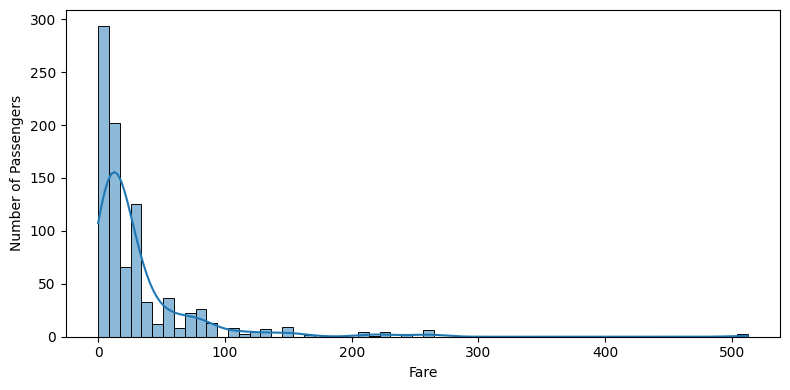

In [40]:
mean_fare= titanic["fare"].mean()
median_fare= titanic["fare"].median()
std_fare= titanic["fare"].std()
var_fare= titanic["fare"].var()
skew_fare= titanic["fare"].skew()
kurt_fare= titanic["fare"].kurt()

print(f"Mean fare is: {mean_fare:.2f}")
print(f"Median fare is: {median_fare}")
print(f"Standard deviation fare is: {std_fare:.2f}")
print(f"Variance fare is: {var_fare:.2f}")
print(f"skeewness fare is: {skew_fare:.2f}")
print(f"Kurtosis fare is: {kurt_fare:.2f}")

fig, ax=plt.subplots(figsize=(8,4))
sns.histplot(data=titanic, x="fare", kde= True, ax=ax)
ax.set_xlabel("Fare")
ax.set_ylabel("Number of Passengers")

plt.tight_layout()
plt.show()

**Interpretation:**

- The **mean is much higher than the median**, indicating that the fare distribution is **right-skewed**.
- A **high standard deviation and variance** suggest that fares are **widely spread out** with significant variation.
- The **high skewness (4.79)** confirms that the distribution is **positively skewed**, meaning there are many low fare values and a few extremely high fares pulling the mean upward.
- The **extremely high kurtosis (33.40)** indicates **very heavy tails**, meaning there are **a lot of extreme outliers** in the fare values.


**2. Conditional Probability Practice:**
- Calculate the probability of a passenger being in pclass 1, P(Pclass=1).
- Calculate the probability of a passenger surviving, P(Survived).
- Now, calculate the conditional probability that a passenger survived given that they were in first class, P(Survived | Pclass=1).
- Compare this to the overall survival probability. What does this suggest?

In [50]:
pclass1_probability = titanic["pclass"].value_counts(normalize=True)[1]
survive_probability = titanic["survived"].value_counts(normalize=True)[1]
pclass1_survive_probability = titanic[titanic["pclass"]==1]["survived"].mean()

print(f"Probability of a passenger being in pclass 1: {pclass1_probability:.2%}")
print(f"Probability of a passenger surviving: {survive_probability:.2%}")
print(f"Probability that a passenger survived given that they were in first class: {pclass1_survive_probability:.2%}")

Probability of a passenger being in pclass 1: 24.24%
Probability of a passenger surviving: 38.38%
Probability that a passenger survived given that they were in first class: 62.96%


**📊 Conditional Probability Insight**

- The **overall probability of survival** is only around **38%**, but the **probability of survival given First Class** is much higher — about **63%**.
- This suggests that **being in First Class significantly increased a passenger’s chances of survival**.
- In other words, **class status was a major factor** influencing survival — possibly due to easier access to lifeboats or priority rescue.

**3. Correlation Analysis:**
- Select the numerical columns ['age_cleaned', 'sibsp', 'parch', 'fare'].
- Calculate the Pearson correlation matrix for these columns.
- Visualize this matrix with a Seaborn heatmap.
- In a Markdown cell, identify the two variables with the strongest positive correlation and explain what this relationship might mean in practical terms.

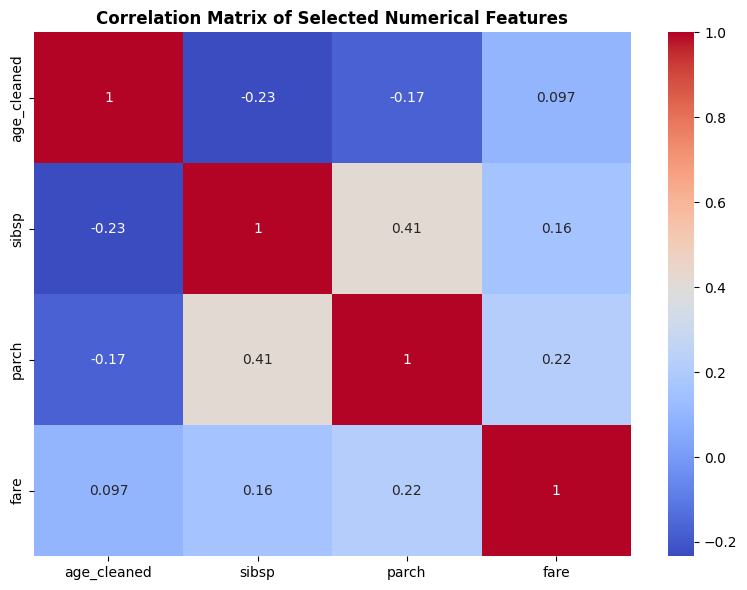

In [51]:
numerical_cols = titanic[['age_cleaned', 'sibsp', 'parch', 'fare']]
corr_matrix = numerical_cols.corr(method='pearson')

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation Matrix of Selected Numerical Features", fontweight='bold')

plt.tight_layout()
plt.show()

**🔍 Correlation Analysis Insights**
- The strongest **positive correlation** is between **`sibsp`** (siblings/spouses aboard) and **`parch`** (parents/children aboard).
- This suggests that passengers who traveled with a sibling or spouse were **also likely** to travel with a parent or child — i.e., they often traveled in **family groups**.
- This makes practical sense because family members often booked travel together, especially on long transatlantic voyages like the Titanic.